# -----------------   Mini-projet && Exercice 5 --------------

# Importation des bibliothèques nécessaires


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Charger un fichier CSV dans un DataFrame

In [38]:

def generer_donnees_ventes(n=100, fichier_csv='ventes.csv'):
    produits = ['Clavier', 'Souris', 'Écran', 'Imprimante', 'Ordinateur', 'Casque', 'Webcam']
    donnees = []

    for _ in range(n):
        produit = random.choice(produits)
        quantite = random.randint(1, 20)
        prix_unitaire = round(random.uniform(10, 500), 2)
        ventes = round(quantite * prix_unitaire, 2)
        date_vente = datetime.today() - timedelta(days=random.randint(0, 365))

        donnees.append({
            'Produit': produit,
            'Quantité': quantite,
            'Prix_Unitaire': prix_unitaire,
            'Ventes': ventes,
            'Date_Vente': date_vente.strftime('%Y-%m-%d')
        })

    df = pd.DataFrame(donnees)
    df.to_csv(fichier_csv, index=False)
    print(f"✅ {n} lignes de données générées et enregistrées dans '{fichier_csv}'.")
    return df

  # Manipuler et transformer les données

In [39]:
def gestion_ventes(fichier_csv='ventes.csv'):
    try:
        df = pd.read_csv(fichier_csv)
        print("✅ Fichier chargé avec succès.\n")
    except FileNotFoundError:
        print(f"❌ Le fichier '{fichier_csv}' est introuvable.")
        return

    print("--- Aperçu des données ---")
    print(df.head(), "\n")

    print("--- Informations générales ---")
    print(df.info(), "\n")

    print("--- Valeurs manquantes ---")
    print(df.isnull().sum(), "\n")

    # Nettoyage
    df.fillna(0, inplace=True)

    # Conversion de la date
    df['Date_Vente'] = pd.to_datetime(df['Date_Vente'])

    # Calcul du prix total
    if {'Quantité', 'Prix_Unitaire'}.issubset(df.columns):
        df['Prix_Total'] = df['Quantité'] * df['Prix_Unitaire']
    else:
        print("⚠️ Colonnes manquantes pour le calcul du Prix_Total.")

    # ✅ Il manque cette ligne :
    return df


 # Statistiques descriptives sur les ventes 

In [40]:
def afficher_statistiques(df):
    print("=== Statistiques descriptives de la colonne 'Ventes' ===")
    print(df['Ventes'].describe(), "\n")
    
    print("Moyenne :", df['Ventes'].mean())
    print("Médiane :", df['Ventes'].median())
    print("Écart-type :", df['Ventes'].std(), "\n")

    print("--- Moyenne des ventes par produit ---")
    print(df.groupby('Produit')['Ventes'].mean(), "\n")

    print("--- Total des ventes par produit ---")
    print(df.groupby('Produit')['Ventes'].sum(), "\n")

    print("--- Top 5 Produits par ventes ---")
    top5 = df.groupby('Produit')['Ventes'].sum().sort_values(ascending=False).head(5)
    print(top5, "\n")

    return top5  

 # Visualiser les résultats avec des graphiques.

In [41]:
def afficher_evolution_mensuelle(df):
    ventes_par_mois = df.groupby(df['Date_Vente'].dt.to_period('M'))['Ventes'].sum()
    plt.figure(figsize=(10, 5))
    ventes_par_mois.plot(kind='line', marker='o', color='teal')
    plt.title("📆 Évolution mensuelle des ventes")
    plt.xlabel("Mois")
    plt.ylabel("Ventes (€)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def afficher_histogramme_ventes(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['Ventes'], bins=20, color='skyblue', edgecolor='black')
    plt.title("📊 Histogramme des ventes")
    plt.xlabel("Montant des ventes (€)")
    plt.ylabel("Nombre de transactions")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def afficher_bar_chart_ventes(df):
    ventes_par_produit = df.groupby('Produit')['Ventes'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    ventes_par_produit.plot(kind='bar', color='coral')
    plt.title("📈 Total des ventes par produit")
    plt.xlabel("Produit")
    plt.ylabel("Ventes totales (€)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


def afficher_boxplot_ventes(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Ventes', by='Produit', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='gray'))
    plt.title("📦 Répartition des ventes par produit (Boxplot)")
    plt.suptitle('')
    plt.xlabel("Produit")
    plt.ylabel("Montant des ventes (€)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Exemple d'utilisation

✅ 100 lignes de données générées et enregistrées dans 'ventes.csv'.
✅ Fichier chargé avec succès.

--- Aperçu des données ---
      Produit  Quantité  Prix_Unitaire   Ventes  Date_Vente
0  Ordinateur        11         389.34  4282.74  2024-11-02
1  Imprimante        10         173.91  1739.10  2024-07-18
2  Ordinateur         5         323.10  1615.50  2024-09-26
3       Écran        12         343.22  4118.64  2025-02-27
4     Clavier         1         309.27   309.27  2024-10-28 

--- Informations générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Produit        100 non-null    object 
 1   Quantité       100 non-null    int64  
 2   Prix_Unitaire  100 non-null    float64
 3   Ventes         100 non-null    float64
 4   Date_Vente     100 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None 

-

C:\Users\pc\AppData\Local\Temp\ipykernel_22016\309263470.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


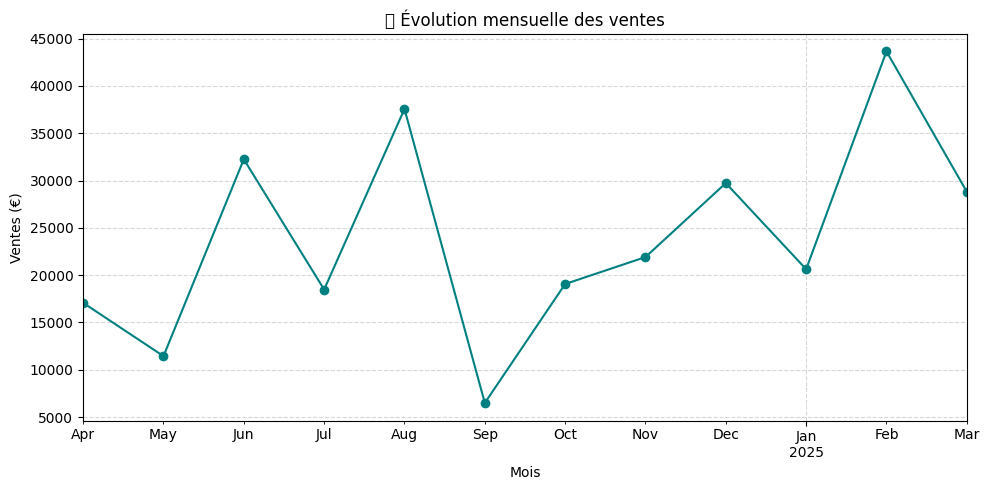

C:\Users\pc\AppData\Local\Temp\ipykernel_22016\309263470.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


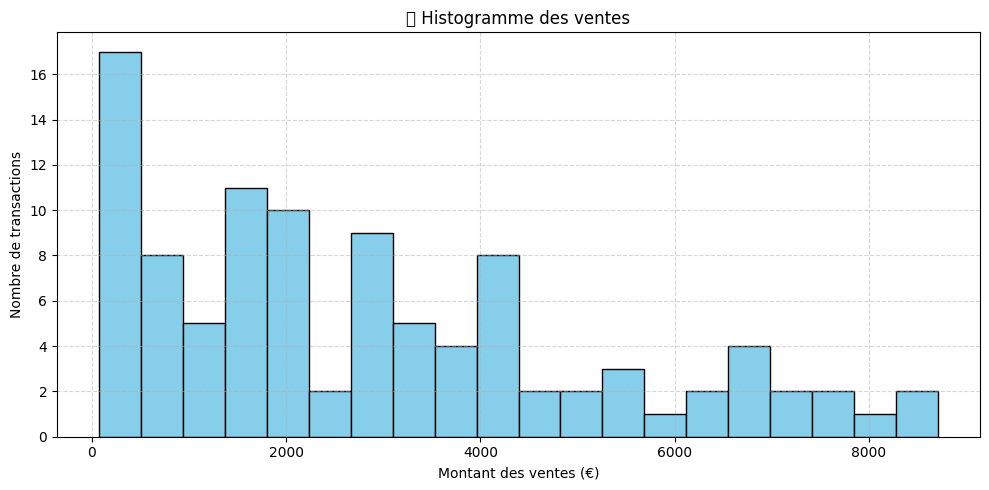

C:\Users\pc\AppData\Local\Temp\ipykernel_22016\309263470.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


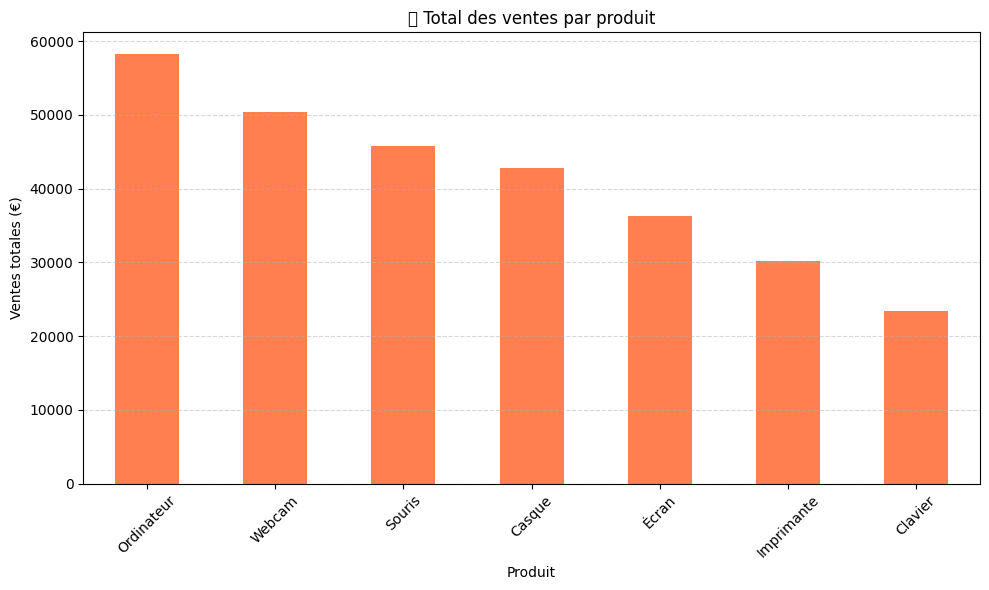

C:\Users\pc\AppData\Local\Temp\ipykernel_22016\309263470.py:48: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

c:\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


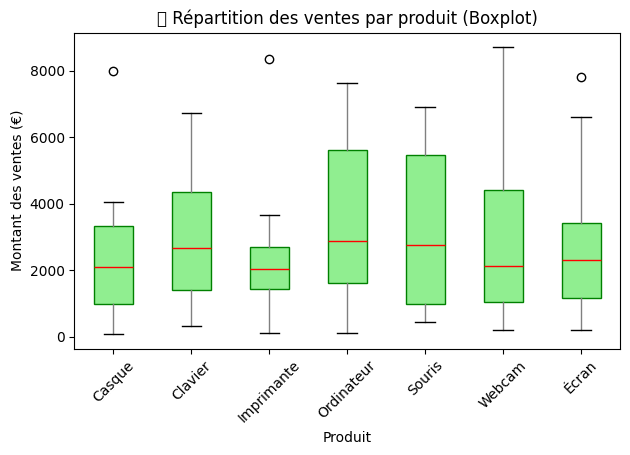

In [42]:
if __name__ == "__main__":
    generer_donnees_ventes(100)
    df = gestion_ventes()  
    afficher_statistiques(df)
    afficher_evolution_mensuelle(df)
    afficher_histogramme_ventes(df)
    afficher_bar_chart_ventes(df)
    afficher_boxplot_ventes(df)


# Analyse des données et transformations numériques

Matrice de covariance :
[[ 0.0887596   0.00073355  0.01251582]
 [ 0.00073355  0.08614802 -0.00740528]
 [ 0.01251582 -0.00740528  0.07927409]]


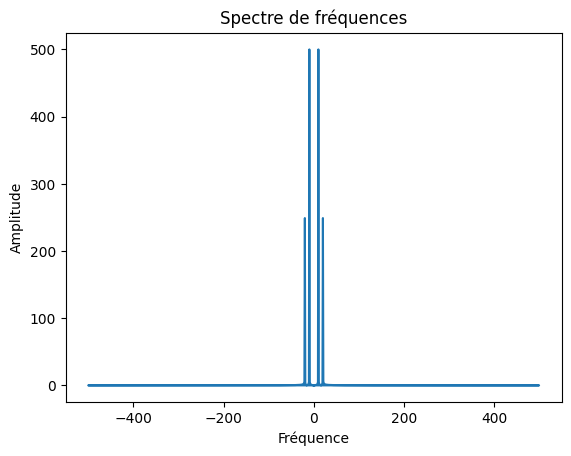

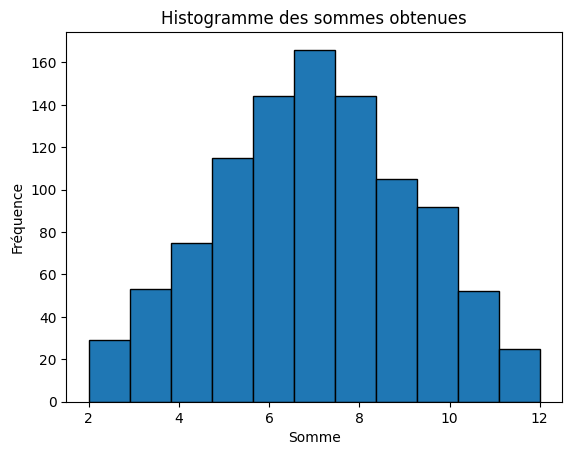

In [43]:

import numpy as np
# Créer un tableau de données de dimensions (100, 3)
np.random.seed(0)
donnees = np.random.rand(100, 3)

# Calculer la matrice de covariance
covariance = np.cov(donnees.T)

print("Matrice de covariance :")
print(covariance)


#Problème 2 : Transformation de Fourier sur un tableau de données sinusoïdales


import numpy as np
import matplotlib.pyplot as plt

# Créer un tableau de données sinusoïdales
t = np.linspace(0, 1, 1000)
donnees = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

# Appliquer la transformation de Fourier
fourier = np.fft.fft(donnees)

# Afficher le spectre de fréquences
freq = np.fft.fftfreq(len(donnees), d=0.001)
plt.plot(freq, np.abs(fourier))
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.title("Spectre de fréquences")
plt.show()


# Problème 3 : Simulation de 1000 lancers de deux dés


import numpy as np
import matplotlib.pyplot as plt

# Simuler 1000 lancers de deux dés
np.random.seed(0)
des1 = np.random.randint(1, 7, 1000)
des2 = np.random.randint(1, 7, 1000)
somme = des1 + des2

# Afficher l'histogramme des sommes obtenues
plt.hist(somme, bins=11, edgecolor='black')
plt.xlabel("Somme")
plt.ylabel("Fréquence")
plt.title("Histogramme des sommes obtenues")
plt.show()